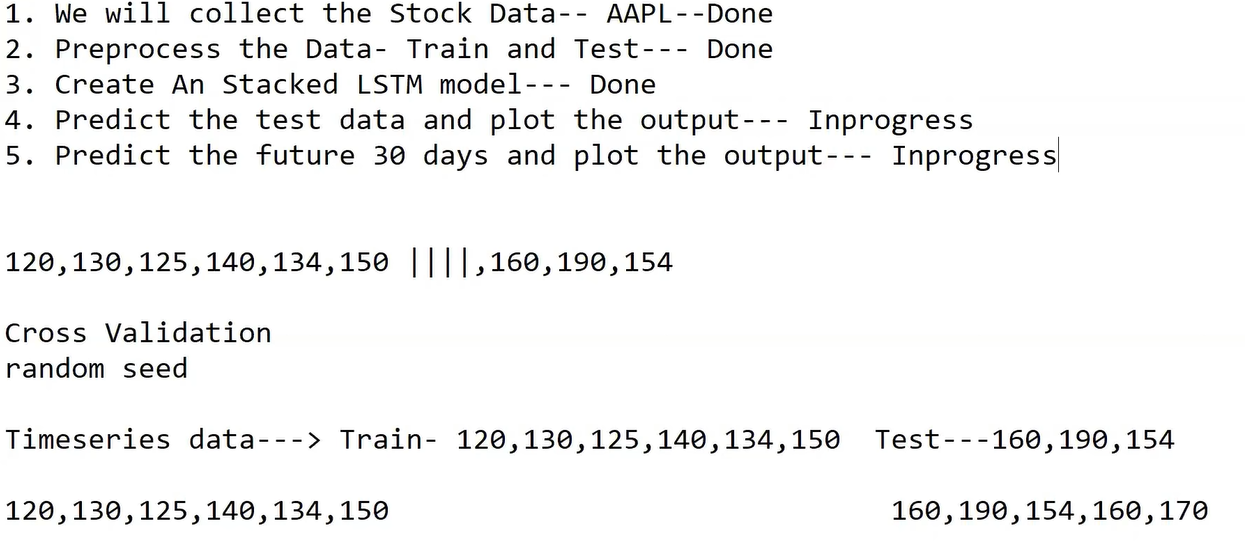

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'D:/Dig/stock_data.txt')

df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [3]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [4]:
df1 = df.reset_index()['close']

# df2[1228:]

In [5]:
df1.shape

(1258,)

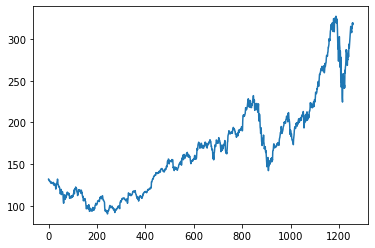

In [6]:
plt.plot(df1)

### LSTM are sensitive to the scale of the data. So we apply MinMaxScaler

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

df1.shape

(1258, 1)

### splitting data into train and test

In [8]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

### converting an array values into a dataset matrix

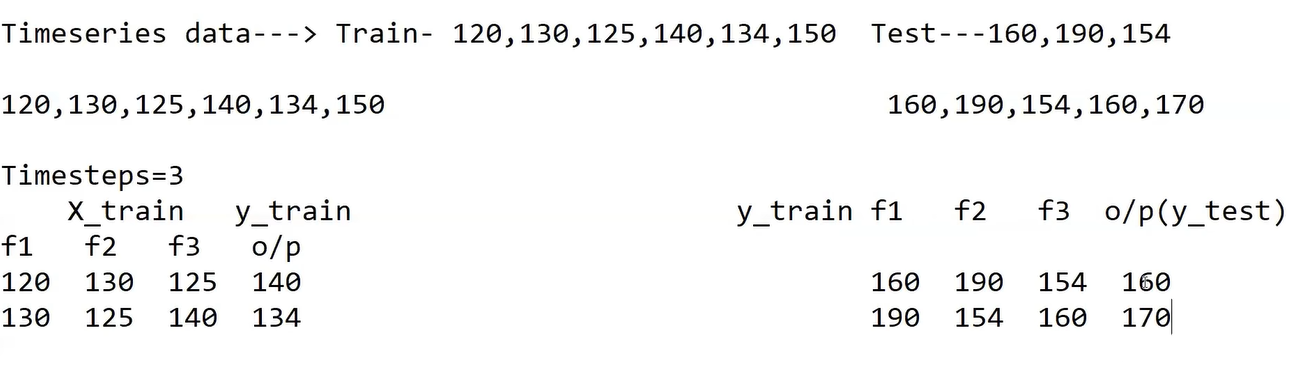

In [9]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [10]:
time_stamp = 100
X_train, y_train = create_dataset(train_data, time_stamp)
X_test, y_test = create_dataset(test_data, time_stamp)

In [11]:
print(X_train.shape, y_train.shape)

(716, 100) (716,)


In [12]:
print(X_test.shape, y_test.shape)

(340, 100) (340,)


### Before implementing any LSTM model we have to reshape our X_train into 3D

In [14]:
# Reshape input to be [sample, time_steps, features] which is required for LSTM

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [15]:
# Creating the STACKED LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 229ms/step - loss: 0.0137 - val_loss: 0.0653
Epoch 2/100
12/12 [==============================] - 2s 144ms/step - loss: 0.0028 - val_loss: 0.0084
Epoch 3/100
12/12 [==============================] - 2s 138ms/step - loss: 9.4975e-04 - val_loss: 0.0041
Epoch 4/100
12/12 [==============================] - 2s 207ms/step - loss: 6.8200e-04 - val_loss: 0.0059
Epoch 5/100
12/12 [==============================] - 2s 188ms/step - loss: 6.6198e-04 - val_loss: 0.0071
Epoch 6/100
12/12 [==============================] - 2s 182ms/step - loss: 6.5060e-04 - val_loss: 0.0052
Epoch 7/100
12/12 [==============================] - 2s 164ms/step - loss: 6.3647e-04 - val_loss: 0.0051
Epoch 8/100
12/12 [==============================] - 2s 167ms/step - loss: 6.1570e-04 - val_loss: 0.0051
Epoch 9/100
12/12 [==============================] - 2s 170ms/step - loss: 6.0132e-04 - val_loss: 0.0046
Epoch 10/100
12/12 [==============================] - 2s 182ms/

12/12 [==============================] - 2s 163ms/step - loss: 2.2562e-04 - val_loss: 0.0012
Epoch 79/100
12/12 [==============================] - 2s 199ms/step - loss: 2.0754e-04 - val_loss: 0.0015
Epoch 80/100
12/12 [==============================] - 4s 305ms/step - loss: 2.1176e-04 - val_loss: 0.0023
Epoch 81/100
12/12 [==============================] - 4s 302ms/step - loss: 2.6506e-04 - val_loss: 0.0012
Epoch 82/100
12/12 [==============================] - 4s 348ms/step - loss: 2.0428e-04 - val_loss: 0.0017
Epoch 83/100
12/12 [==============================] - 3s 262ms/step - loss: 1.9183e-04 - val_loss: 0.0011
Epoch 84/100
12/12 [==============================] - 3s 244ms/step - loss: 1.8658e-04 - val_loss: 0.0012
Epoch 85/100
12/12 [==============================] - 3s 244ms/step - loss: 1.8338e-04 - val_loss: 0.0010
Epoch 86/100
12/12 [==============================] - 3s 282ms/step - loss: 1.8450e-04 - val_loss: 0.0010
Epoch 87/100
12/12 [==============================] - 3s 25

### Prediction and Checking Performance

In [17]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

### Transformback to original form

In [18]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

### Calculate RMSE performance metrics

In [19]:
import math

from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_pred))

142.23986310843364

### Test data RMSE

In [20]:
math.sqrt(mean_squared_error(y_test,test_pred))

238.64787984698918

### Plotting

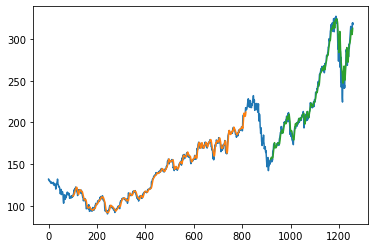

In [22]:
look_back = 100
trainpredplot = np.empty_like(df1)
trainpredplot[:,:] = np.nan
trainpredplot[look_back:len(train_pred)+look_back, :] = train_pred

testpredplot = np.empty_like(df1)
testpredplot[:,:] = np.nan
testpredplot[len(train_pred)+(look_back*2)+1:len(df1)-1, :] = test_pred

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredplot)
plt.plot(testpredplot)
plt.show()

### Predict Future 30 Days

In [23]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [25]:
temp_ip = list(x_input)
temp_ip = temp_ip[0].tolist()

### Demonstrate prediction for next 10 days

In [27]:
from numpy import array

lst_op = []
n_steps = 100
i=0

while(i<30):
    if len(temp_ip)>100:
        
        # Print (temp_input)
        x_input = np.array(temp_ip[1:])
        print(f"{i} day input {x_input}")
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps,1))
        
        # Print(x_input)
        yhat = model.predict(x_input,verbose=0)
        print(f"{i} day input {yhat}")
        temp_ip.extend(yhat[0].tolist())
        temp_ip=temp_ip[1:]
        
        # Print(temp_ip)
        lst_op.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input,verbose=0)
        print(yhat[0])
        
        temp_ip.extend(yhat[0].tolist())
        print(len(temp_ip))
        
        lst_op.extend(yhat.tolist())
        i=i+1
print(lst_op)

0 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.90095415 0.927932

9 day input [[0.94243246]]
10 day input [0.94950604 0.96424048 0.95512117 0.95989192 0.96635143 0.96246728
 0.92295027 0.9598497  0.98792536 0.98594106 0.92531453 0.92172591
 0.96474711 0.97572406 0.99159841 0.96972895 0.97614625 0.96795575
 1.         0.99016297 0.99050072 0.96538039 0.98488559 0.97086887
 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273
 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725
 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371
 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494
 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402
 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832
 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543
 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148
 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415
 0.92793211 0.948535   0.93333615 0.91746179 0.92544119 0.91771511
 0.9483239  0.94064004

19 day input [[0.9658735]]
20 day input [0.92531453 0.92172591 0.96474711 0.97572406 0.99159841 0.96972895
 0.97614625 0.96795575 1.         0.99016297 0.99050072 0.96538039
 0.98488559 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324
 0.77336823 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316
 0.83884995 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557
 0.64118044 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169
 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104
 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506
 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475
 0.78776492 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096
 0.79473106 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279
 0.88782403 0.90095415 0.92793211 0.948535   0.93333615 0.91746179
 0.92544119 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033
 0.96491598 0.95772827 0.95804805 0.95477074 0.95030576 0.94591463
 0.94226611 0.93975037 0.9

In [28]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

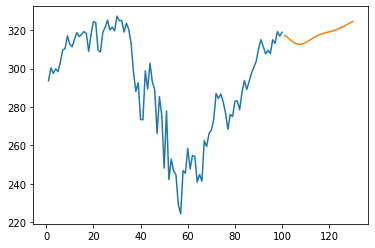

In [29]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_op))

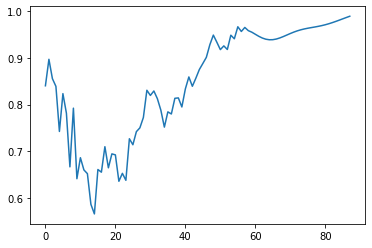

In [30]:
df3=df1.tolist()
df3.extend(lst_op)
plt.plot(df3[1200:])

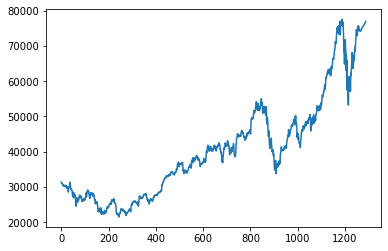

In [32]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)